- **Programmer:**
    - **Shaun Pritchard**
    - **Ismael A Lopez** 

## **Assigment 2**
**Brief overview of assignment**

***You will perform a penalized (regularized) least squares fit of a linear model using elastic net, with the model parameters obtained by coordinate descent***

<hr>

### **Overview: Primary - Assignment 2**

We analyzed the credit card data from N=400 training observations that you examined in Programming Assignment 1 using a penalized (regularized) least squares fit of a linear model using elastic net, with model parameters obtained by coordinate descent. 

Initially, we each worked independently, then we collaborated afterwards to finalize the assignment deliverables. This resulted in the completion of 2 methods for achieving the same goal, namely implementing ElastNet with coordinate descent. This is the second take on assignment 2. The aim was to display different methods of achieving the same abstraction.


> ***Table of Contents***
<hr>


* [Import Packages](#Import_Packages)
    * [Import packages for manipulating data](#Import_packages_for_manipulating_data)
    * [Import packages for splitting data](#Import_packages_for_splitting_data)
    * [Import packages for modeling data](#Import_packages_for_modeling_data)
    * [Import packages for Scaling and Centering data](#Import_packages_for_Scaling_and_Centering_data)
    * [Import packages for Measuring Model Perormance](#Import_packages_for_Measuring_Model_Perormance)
    
* [Data Processing](#Data_Processing)
    * [Import Data](#Import_data)
    * [Lets change the categorical values](#Lets_change_the_categorical_values)
    * [Create Predictor and Target numpy array](#Create_Predictor_and_Target_numpy_array)
    * [Create a Normalize copy of variables](#Create_a_Normalize_copy_of_variables)
    * [Split Data](#Split_Data:)
* [Regression Model](#Regression_Model)
    * [Define our learning rates:](#Define_our_learning_rates)
    * [Create the Regression Objects](#Create_the_Regression_Objects)
        * [Elastic Net Manual](#Ridge_Regression_Manual)

        * [Elastic Net Library](#Ridge_Regression_Library)



> ***Deliverables***
<hr>

* [**Deliverable 6.1**](#Deliverable_6.1)
* [**Deliverable 6.2**](#Deliverable_6.2)
* [**Deliverable 6.3**](#Deliverable_6.3)
* [**Deliverable 6.4**](#Deliverable_6.4)
* [**Deliverable 6. Reason for difference**](#Deliverable_6_Reason_for_difference)

# Import Packages <a class="anchor" id="Import_Packages"></a>

### Import packages for manipulating data  <a class="anchor" id="Import_packages_for_manipulating_data"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.mlab as mlab
import math
import csv
import random
%matplotlib inline


### Import packages for splitting data  <a class="anchor" id="Import_packages_for_splitting_data"></a>

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV


### Import packages for modeling data  <a class="anchor" id="Import_packages_for_modeling_data"></a>

In [3]:
# Import models:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as linearR_Model, Ridge  as RidgeR_Model
from sklearn.linear_model import RidgeCV

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

from sklearn.exceptions import ConvergenceWarning
#from sklearn.utils._testing import ignore_warnings
import warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning) # To filter out the Convergence warning
warnings.filterwarnings('ignore', category=UserWarning)
from itertools import product


### Import packages for Scaling and Centering data  <a class="anchor" id="Import_packages_for_Scaling_and_Centering_data"></a>

In [4]:
from sklearn.preprocessing import StandardScaler

### Import packages for Measuring Model Perormance  <a class="anchor" id="Import_packages_for_Measuring_Model_Perormance"></a>

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer

# Data Processing <a class="anchor" id="Data_Processing"></a>

### Import Data  <a class="anchor" id="Import_data"></a>

In [6]:
dataset = pd.read_csv ('Credit_N400_p9.csv')
dataset.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,903
2,104.593,7075,514,4,71,11,Male,No,No,580


In [7]:
# What are the datatypes of each observation:
print(dataset.dtypes)
# Shape of my data
print('The size of our data are: ',dataset.shape)

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Balance        int64
dtype: object
The size of our data are:  (400, 10)


In [8]:
# Are there any null or missing values
dataset.isnull().sum()


Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Gender       0
Student      0
Married      0
Balance      0
dtype: int64

### Lets change the categorical values  <a class="anchor" id="Lets_change_the_categorical_values"></a>


In [9]:
print("Unique Values for Genders: ", dataset.Gender.unique())
print("Unique Values for Student: ", dataset.Student.unique())
print("Unique Values for Married: ", dataset.Married.unique())

Unique Values for Genders:  ['Male' 'Female']
Unique Values for Student:  ['No' 'Yes']
Unique Values for Married:  ['Yes' 'No']


In [10]:
# Replace Gender to qualitative value
dataset['Gender'].replace({'Male':0, 'Female':1}, inplace=True)
# Replace Student status to qualitative value
dataset['Student'].replace({'No':0, 'Yes':1}, inplace=True)
# Replace Martial status to qualitative value
dataset['Married'].replace({'No':0, 'Yes':1}, inplace=True)

In [11]:
# Check our categorical change:
dataset.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance
0,14.891,3606,283,2,34,11,0,0,1,333
1,106.025,6645,483,3,82,15,1,1,1,903
2,104.593,7075,514,4,71,11,0,0,0,580


### Create Predictor and Target numpy array  <a class="anchor" id="Create_Predictor_and_Target_numpy_array"></a>

In [12]:
# Target:
y= dataset['Balance'].to_numpy()
y[:3]

array([333, 903, 580])

In [13]:
# Convert the Pandas dataframe to numpy ndarray for computational improvement
X = dataset.iloc[:,:-1]
X = X.to_numpy()

print(type(X), X[:1])

<class 'numpy.ndarray'> [[1.4891e+01 3.6060e+03 2.8300e+02 2.0000e+00 3.4000e+01 1.1000e+01
  0.0000e+00 0.0000e+00 1.0000e+00]]


In [14]:
# Let's add the predictor to a dataframe and get some descriptors:
X_desc = pd.DataFrame(X, columns=dataset.columns[:-1])
X_desc.describe()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,0.517500,0.100000,0.61250
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,0.500319,0.300376,0.48779
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000,0.000000,0.00000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,0.000000,0.000000,0.00000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,1.000000,0.000000,1.00000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,1.000000,0.000000,1.00000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1.000000,1.000000,1.00000


### Create a Normalize copy of variables <a class="anchor" id="Create_a_Normalize_copy_of_variables"></a>

In [15]:
# Create Standarizing ObjectPackages:
#standardization = StandardScaler()

# Strandardize 
n_observations = len(dataset)
variables = dataset.columns


# Standardize the Predictors (X)
#Xst = standardization.fit_transform(X)

# Add a constanct to the predictor matrix
#Xst = np.column_stack((np.ones(n_observations),Xst))


# Save the original M and Std of the original data. Used for unstandardize
#original_means = standardization.mean_

# we chanced standardization.std_ to standardization.var_**.5
#originanal_stds = standardization.var_**.5


def standardize(X):
    mean_x, std_x = np.mean(X, 0), np.std(X, 0)
    standardization = (X - mean_x) / std_x
    return  mean_x, std_x, standardization

original_means, originanal_stds, Xst = standardize(X)


print("observations :", n_observations)
print("variables :", variables[:2])
print('original_means :', original_means)
print('originanal_stds :', originanal_stds)

observations : 400
variables : Index(['Income', 'Limit'], dtype='object')
original_means : [4.5218885e+01 4.7356000e+03 3.5494000e+02 2.9575000e+00 5.5667500e+01
 1.3450000e+01 5.1750000e-01 1.0000000e-01 6.1250000e-01]
originanal_stds : [3.52001903e+01 2.30531179e+03 1.54530616e+02 1.36955969e+00
 1.72282310e+01 3.12129781e+00 4.99693656e-01 3.00000000e-01
 4.87179382e-01]


In [16]:
# Let's add the predictor to a dataframe and get some descriptors:
Xst_desc = pd.DataFrame(Xst, columns=dataset.columns[:-1])
Xst_desc.describe()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,1.729172e-16,-1.584843e-16,9.159340e-18,6.161738e-17,1.830480e-16,2.142730e-16,5.828671e-17,-3.330669e-17,1.987299e-16
std,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00
min,-9.904743e-01,-1.683330e+00,-1.695069e+00,-1.429291e+00,-1.896161e+00,-2.707207e+00,-1.035635e+00,-3.333333e-01,-1.257237e+00
25%,-6.878268e-01,-7.146973e-01,-6.968846e-01,-6.991298e-01,-8.078311e-01,-7.849299e-01,-1.035635e+00,-3.333333e-01,-1.257237e+00
50%,-3.438443e-01,-4.906061e-02,-7.079503e-02,3.103187e-02,1.929972e-02,1.762088e-01,9.655916e-01,-3.333333e-01,7.953949e-01
75%,3.480625e-01,4.932738e-01,5.326453e-01,7.611935e-01,8.319194e-01,8.169679e-01,9.655916e-01,-3.333333e-01,7.953949e-01
max,4.017453e+00,3.980980e+00,4.057837e+00,4.412002e+00,2.457159e+00,2.098486e+00,9.655916e-01,3.000000e+00,7.953949e-01


In [17]:
# Center y not using a library:
y_Mean = y.mean(axis = 0) # Original y mean

y_Centered =  y-y_Mean

print('Original y: ',y[:3])
print("mean of y :", y_Mean, "Std of y :", y.std(axis = 0))

print('Centered y: ',y_Centered[:3])
print("mean of y centered :", y_Centered.mean(axis = 0), "Std of y centered :", y_Centered.std(axis = 0))

print(y_Centered.shape)

Original y:  [333 903 580]
mean of y : 520.015 Std of y : 459.18381915633745
Centered y:  [-187.015  382.985   59.985]
mean of y centered : 4.206412995699793e-14 Std of y centered : 459.18381915633745
(400,)


### Split Data: <a class="anchor" id="Split_Data:"></a>

In [18]:
#let's first split it into train and test part
X_train, X_out_sample, y_train, y_out_sample = train_test_split(Xst, y_Centered, test_size=0.40, random_state=101) # Training and testing split

X_validation, X_test, y_validation, y_test = train_test_split(X_out_sample, y_out_sample, test_size=0.50, random_state=101) # Validation and test split

# Print Data size
print ("Train dataset sample size: {}".format(len(X_train)))
print ("Validation dataset sample size: {}".format(len(X_validation)))
print ("Test dataset sample size: {}".format( len(X_test)))

Train dataset sample size: 240
Validation dataset sample size: 80
Test dataset sample size: 80


# Regression Model <a class="anchor" id="Regression_Model"></a>
<hr>

### Define our learning rates <a class="anchor" id="Define_our_learning_rates"></a>

In [19]:
# Define my tuning parameter values 𝜆:

learning_rates_λ = [1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6]
print(learning_rates_λ)

[0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0]


In [20]:
# Define my L1 Ratio:
l1_ratio = [0, 1/5, 2/5, 3/5, 4/5, 1]
l1_ratio

[0, 0.2, 0.4, 0.6, 0.8, 1]

In [21]:
tuning_params = list(product(l1_ratio, learning_rates_λ))
tuning_params[:2]

[(0, 0.01), (0, 0.1)]

### Create the Regression Objects <a class="anchor" id="Create_the_Regression_Objects"></a>

**Elastic Net Manual** <a class="anchor" id="Ridge_Regression_Manual"></a>

In [22]:
def predict(X, w):
    return np.dot(X, w)



def coordinateDescent(X, y, alpha, l1_ratio, tol=1e-4, max_it = 1000, path_length = 5 ):

    b = np.sum(X ** 2, 0) # b𝑘
    
    X_row , X_col = X.shape  

    𝛽x = np.random.uniform(-1,1,X_col) 

    for i in range(max_it):
         while True:
            B_s = 𝛽x   
            for k in range(len(𝛽x)):            
                a_k  = np.dot(X[:, k].T, np.add(y - np.dot(X, 𝛽x), np.multiply(𝛽x[k], X[:, k])))
                𝛽x[k] = (np.sign(a_k) * max(0, np.abs(a_k) - (alpha*(1-l1_ratio)/2)) / np.add(b[k], (alpha*l1_ratio)))
            if np.all(abs(B_s - 𝛽x) < tol): # break out of the while loop if the diff is smaller than the tolerance level
                break
    return 𝛽x


In [23]:
cord = coordinateDescent(Xst, y_Centered , 1 , 1) 

print ("Betas= ", cord)
y_predM = predict(Xst,cord)
print("MSE = ",mean_squared_error(y_Centered, y_predM))
print('R^2 Test', r2_score(y_Centered, y_predM))

Betas=  [-271.23140505  369.54666614  242.58484834   21.49299965  -11.27071383
   -3.04537408   -5.09410457  127.07840976   -3.97537725]
MSE =  9530.739744827893
R^2 Test 0.9547984363322635


**Elastic Net Library** <a class="anchor" id="Ridge_Regression_Library"></a>

In [24]:
# ElasticNet Regression
from sklearn.linear_model import ElasticNet
Library_ElasticNet = ElasticNet(alpha= 1 , l1_ratio= 1, max_iter=1000, tol=0.01)

Library_ElasticNet.fit(Xst,y_Centered)

ElasticNet(alpha=1, copy_X=True, fit_intercept=True, l1_ratio=1, max_iter=1000,
           normalize=False, positive=False, precompute=False, random_state=None,
           selection='cyclic', tol=0.01, warm_start=False)

In [25]:
y_predM = Library_ElasticNet.predict(Xst)
print ("Betas= ", Library_ElasticNet.coef_)
#print ("Intercept= ",Library_ElasticNet.intercept_)
print("MSE = ",mean_squared_error(y_Centered, y_predM))
print('R^2 Test', r2_score(y_Centered, y_predM))

Betas=  [-268.21425034  600.98723265    8.38958575   30.71557831  -10.21941072
   -3.26512024   -4.02639722  127.67370907   -1.48694207]
MSE =  9630.186607360609
R^2 Test 0.9543267884005519


## **Deliverable 6.1**  <a class="anchor" id="Deliverable_6.1"></a>
<h>

> Illustrate the effect of the tuning parameter on the inferred elastic net regression coefficients by generating six plots (one for each 𝛼 value) of nine lines (one for each of the 𝑝=9 features), with the 𝑦-axis as 𝛽̂
𝑗, 𝑗=1,2,…,9, and the 𝑥-axis the corresponding log-scaled tuning parameter value log10(𝜆) that generated the particular 𝛽̂
𝑗.

### Manual:

In [26]:
M𝛽_per_λ = []
tP = []
for tuning_param in tuning_params:
    cord = coordinateDescent(Xst, y_Centered , tuning_param[1] , tuning_param[0]) 

    M𝛽_per_λ.append(cord)
    tP.append((tuning_param[0], tuning_param[1]))


In [27]:
TunnedM𝛽_df = pd.DataFrame( np.column_stack( (np.array(tP), np.array(M𝛽_per_λ)) ) )
TunnedM𝛽_df.columns=['Alpha', 'Lamba','Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married']
TunnedM𝛽_df.iloc[:5,:]

,Alpha,Lamba,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married
0,0.0,0.01,-274.637623,447.440908,168.000978,24.646944,-10.931204,-3.492450,-5.200227,127.955017,-3.403559
1,0.0,0.10,-274.637080,447.431438,168.009896,24.646467,-10.931135,-3.492289,-5.200100,127.954829,-3.403522
2,0.0,1.00,-274.631872,447.428054,168.007970,24.645602,-10.930322,-3.491152,-5.198826,127.953503,-3.402529
3,0.0,10.00,-274.579548,447.293206,168.089481,24.632628,-10.922326,-3.479251,-5.186089,127.939632,-3.393288
4,0.0,100.00,-274.056412,445.990350,168.859082,24.504837,-10.842309,-3.360483,-5.058720,127.801196,-3.300570


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


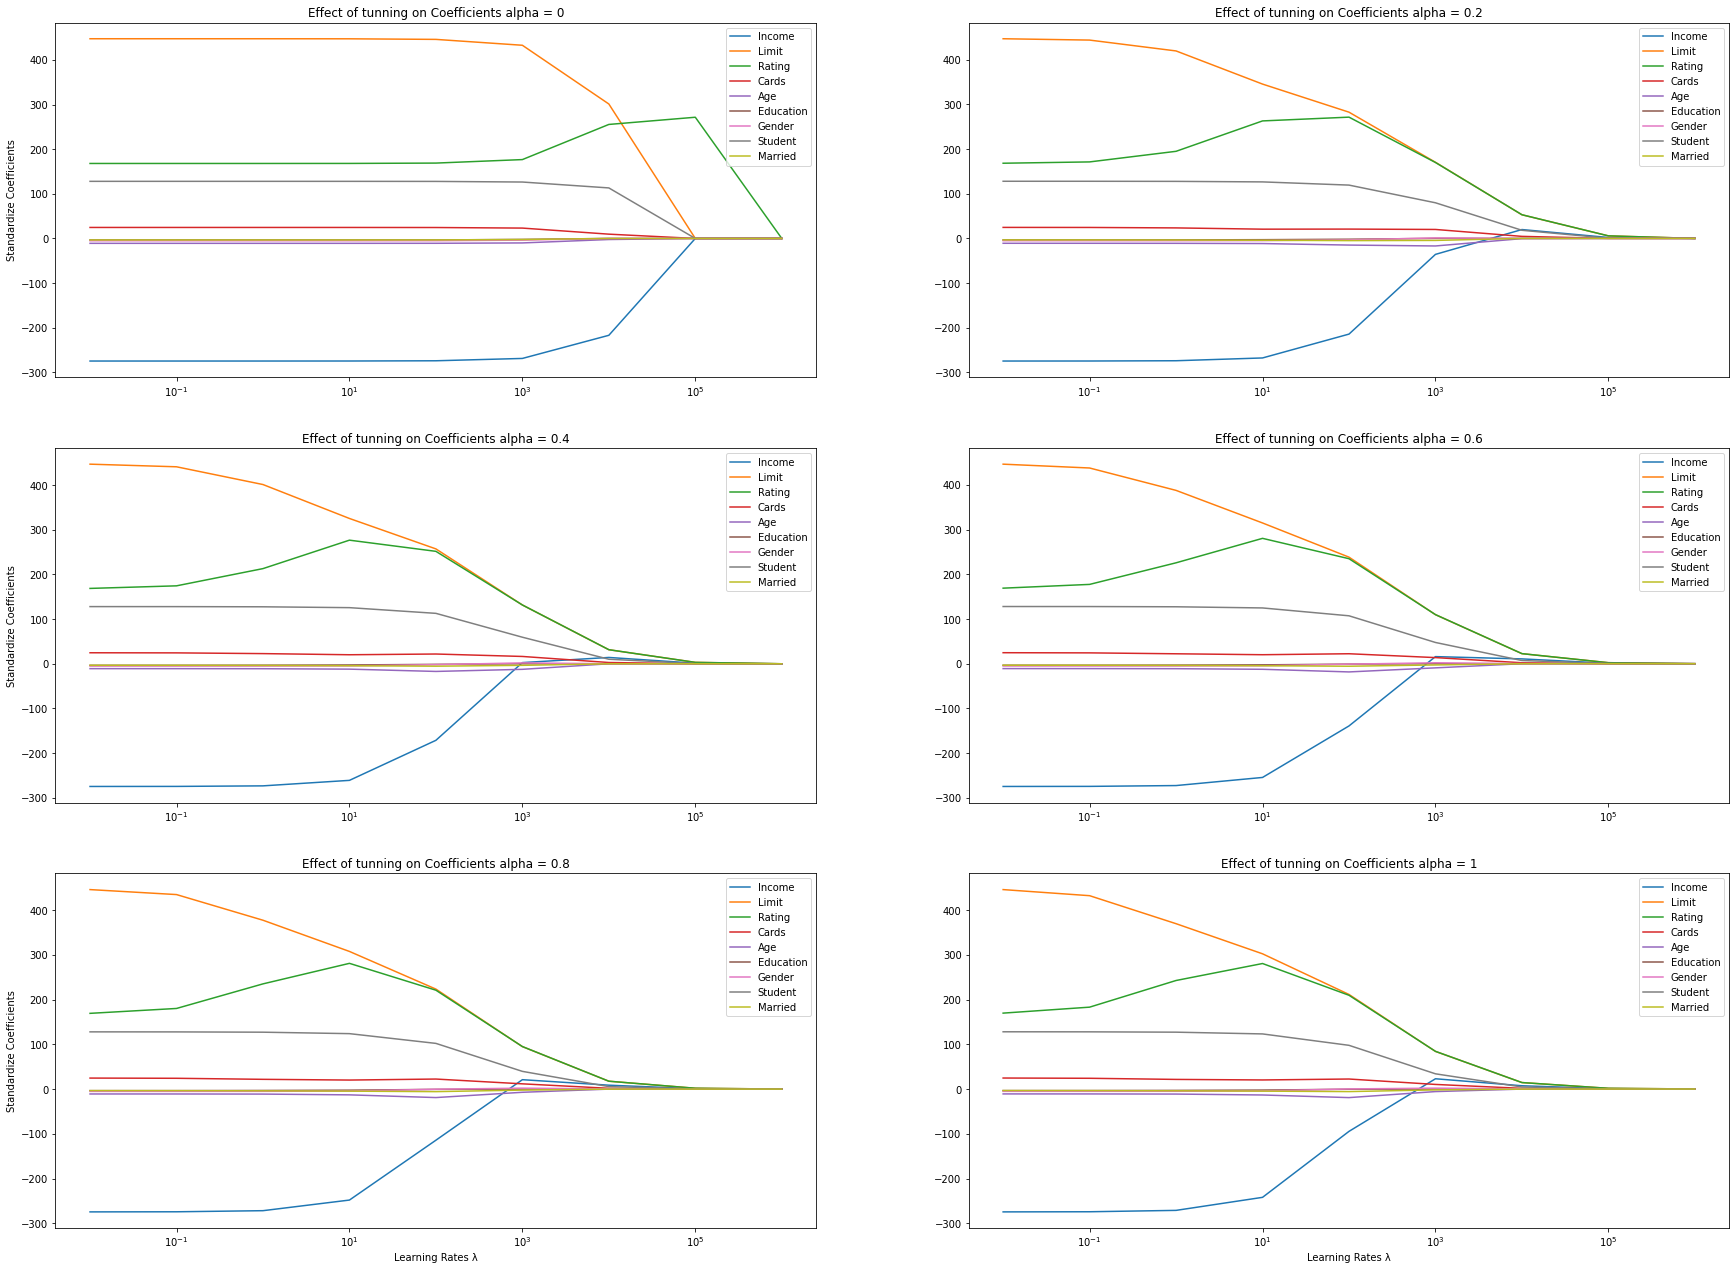

In [28]:
plt.figure(figsize=(30,30))

plt.subplot(4, 2, 1)
plt.plot(TunnedM𝛽_df[TunnedM𝛽_df.Alpha.eq(0)].iloc[:,1:2],TunnedM𝛽_df[TunnedM𝛽_df.Alpha.eq(0)].iloc[:,2:])

plt.title('Effect of tunning on Coefficients alpha = 0')
plt.ylabel('Standardize Coefficients')

plt.xscale('log')
plt.legend(loc='best')
plt.legend(TunnedM𝛽_df.columns[2:])


plt.subplot(4, 2, 2)
plt.plot(TunnedM𝛽_df[TunnedM𝛽_df.Alpha.eq(0.2)].iloc[:,1:2],TunnedM𝛽_df[TunnedM𝛽_df.Alpha.eq(0.2)].iloc[:,2:])

plt.title('Effect of tunning on Coefficients alpha = 0.2')

plt.xscale('log')
plt.legend(loc='best')
plt.legend(TunnedM𝛽_df.columns[2:])


plt.subplot(4, 2, 3)

plt.plot(TunnedM𝛽_df[TunnedM𝛽_df.Alpha.eq(0.4)].iloc[:,1:2],TunnedM𝛽_df[TunnedM𝛽_df.Alpha.eq(0.4)].iloc[:,2:])

plt.title('Effect of tunning on Coefficients alpha = 0.4')
plt.ylabel('Standardize Coefficients')

plt.xscale('log')
plt.legend(loc='best')
plt.legend(TunnedM𝛽_df.columns[2:])


plt.subplot(4, 2, 4)

plt.plot(TunnedM𝛽_df[TunnedM𝛽_df.Alpha.eq(0.6)].iloc[:,1:2],TunnedM𝛽_df[TunnedM𝛽_df.Alpha.eq(0.6)].iloc[:,2:])

plt.title('Effect of tunning on Coefficients alpha = 0.6')

plt.xscale('log')
plt.legend(loc='best')
plt.legend(TunnedM𝛽_df.columns[2:])


plt.subplot(4, 2, 5)

plt.plot(TunnedM𝛽_df[TunnedM𝛽_df.Alpha.eq(0.8)].iloc[:,1:2],TunnedM𝛽_df[TunnedM𝛽_df.Alpha.eq(0.8)].iloc[:,2:])

plt.title('Effect of tunning on Coefficients alpha = 0.8')
plt.xlabel('Learning Rates λ')
plt.ylabel('Standardize Coefficients')

plt.xscale('log')
plt.legend(loc='best')
plt.legend(TunnedM𝛽_df.columns[2:])



plt.subplot(4, 2, 6)

plt.plot(TunnedM𝛽_df[TunnedM𝛽_df.Alpha.eq(1)].iloc[:,1:2],TunnedM𝛽_df[TunnedM𝛽_df.Alpha.eq(1)].iloc[:,2:])

plt.title('Effect of tunning on Coefficients alpha = 1')
plt.xlabel('Learning Rates λ')

plt.xscale('log')
plt.legend(loc='best')
plt.legend(TunnedM𝛽_df.columns[2:])


**Elastic Net with Library**

In [29]:
from sklearn.linear_model import ElasticNet

L𝛽_per_λ=[] # set empty list

# Evaluate tuning parameters with Elastic Net penalty
for tuning_param in tuning_params:
        Library_ElasticNet=ElasticNet(alpha=tuning_param[1] , l1_ratio= tuning_param[0], max_iter=5000, tol=0.01)
        Library_ElasticNet.fit(X_train, y_train)
        c = np.array(Library_ElasticNet.coef_)
        c = np.append(tuning_param[1],c)
        c = np.append(tuning_param[0],c)
        L𝛽_per_λ.append(c)


In [30]:
TunnedL𝛽_df=pd.DataFrame(L𝛽_per_λ)
TunnedL𝛽_df.columns=['Alpha', 'Lamba','Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married']
TunnedL𝛽_df.head()

,Alpha,Lamba,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married
0,0.0,0.01,-265.369630,329.834640,284.652302,12.722129,-11.613273,2.691243,0.921678,127.256830,-4.283206
1,0.0,0.10,-172.274513,260.301650,255.029192,13.422481,-14.685165,4.018463,2.601951,118.318168,-1.578385
2,0.0,1.00,6.950776,132.868457,132.815815,10.324809,-9.332965,6.792773,4.107710,68.710226,2.897224
3,0.0,10.00,17.908389,34.237439,34.303117,2.395874,0.456902,2.534493,0.818063,12.577944,1.411024
4,0.0,100.00,2.548796,4.252923,4.261115,0.284014,0.166997,0.320661,0.078914,1.344868,0.192521


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


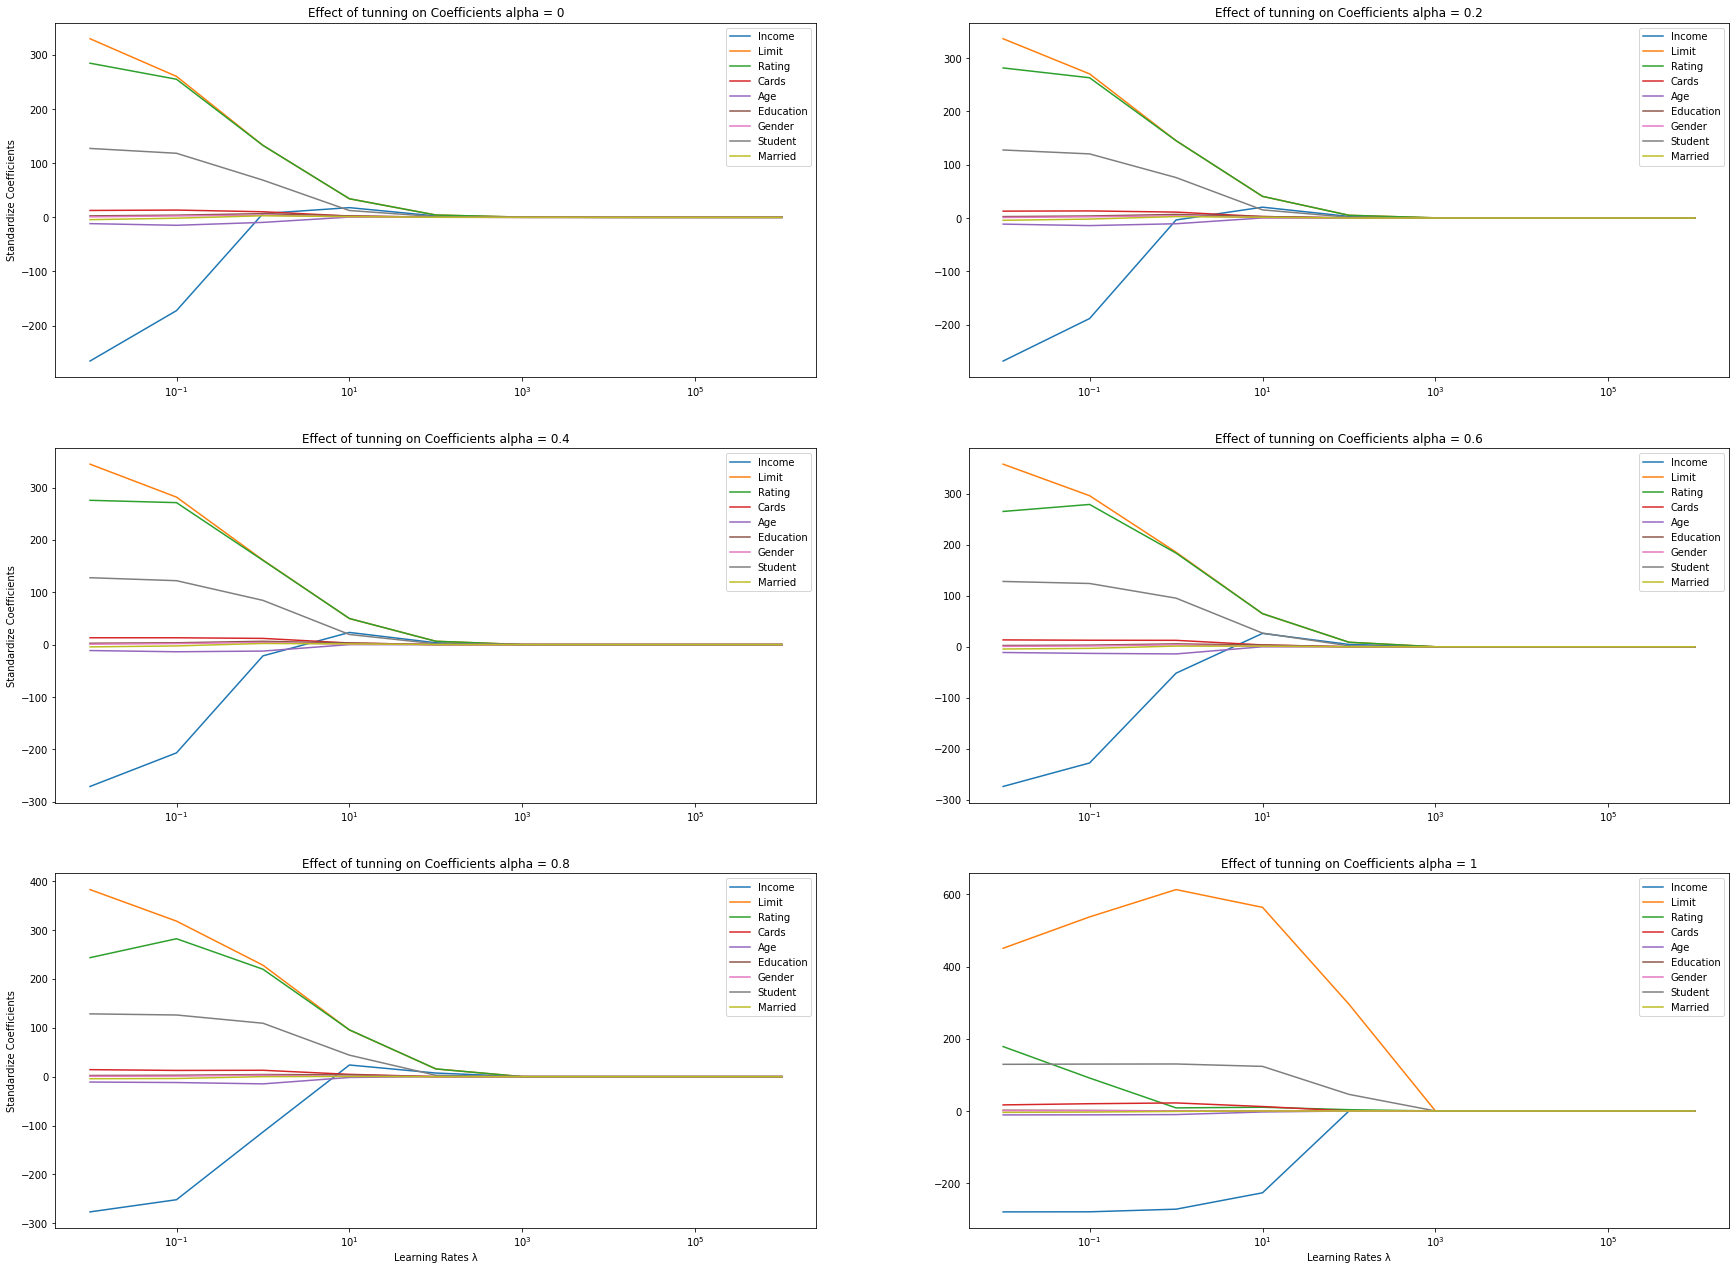

In [31]:
plt.figure(figsize=(30,30))

plt.subplot(4, 2, 1)
plt.plot(TunnedL𝛽_df[TunnedL𝛽_df.Alpha.eq(0)].iloc[:,1:2],TunnedL𝛽_df[TunnedL𝛽_df.Alpha.eq(0)].iloc[:,2:])

plt.title('Effect of tunning on Coefficients alpha = 0')
plt.ylabel('Standardize Coefficients')

plt.xscale('log')
plt.legend(loc='best')
plt.legend(TunnedL𝛽_df.columns[2:])


plt.subplot(4, 2, 2)
plt.plot(TunnedL𝛽_df[TunnedL𝛽_df.Alpha.eq(0.2)].iloc[:,1:2],TunnedL𝛽_df[TunnedL𝛽_df.Alpha.eq(0.2)].iloc[:,2:])

plt.title('Effect of tunning on Coefficients alpha = 0.2')

plt.xscale('log')
plt.legend(loc='best')
plt.legend(TunnedL𝛽_df.columns[2:])


plt.subplot(4, 2, 3)

plt.plot(TunnedL𝛽_df[TunnedL𝛽_df.Alpha.eq(0.4)].iloc[:,1:2],TunnedL𝛽_df[TunnedL𝛽_df.Alpha.eq(0.4)].iloc[:,2:])

plt.title('Effect of tunning on Coefficients alpha = 0.4')
plt.ylabel('Standardize Coefficients')

plt.xscale('log')
plt.legend(loc='best')
plt.legend(TunnedL𝛽_df.columns[2:])


plt.subplot(4, 2, 4)

plt.plot(TunnedL𝛽_df[TunnedL𝛽_df.Alpha.eq(0.6)].iloc[:,1:2],TunnedL𝛽_df[TunnedL𝛽_df.Alpha.eq(0.6)].iloc[:,2:])

plt.title('Effect of tunning on Coefficients alpha = 0.6')

plt.xscale('log')
plt.legend(loc='best')
plt.legend(TunnedL𝛽_df.columns[2:])


plt.subplot(4, 2, 5)

plt.plot(TunnedL𝛽_df[TunnedL𝛽_df.Alpha.eq(0.8)].iloc[:,1:2],TunnedL𝛽_df[TunnedL𝛽_df.Alpha.eq(0.8)].iloc[:,2:])

plt.title('Effect of tunning on Coefficients alpha = 0.8')
plt.xlabel('Learning Rates λ')
plt.ylabel('Standardize Coefficients')

plt.xscale('log')
plt.legend(loc='best')
plt.legend(TunnedL𝛽_df.columns[2:])



plt.subplot(4, 2, 6)

plt.plot(TunnedL𝛽_df[TunnedL𝛽_df.Alpha.eq(1)].iloc[:,1:2],TunnedL𝛽_df[TunnedL𝛽_df.Alpha.eq(1)].iloc[:,2:])

plt.title('Effect of tunning on Coefficients alpha = 1')
plt.xlabel('Learning Rates λ')

plt.xscale('log')
plt.legend(loc='best')
plt.legend(TunnedL𝛽_df.columns[2:])


# **Deliverable 6.2**  <a class="anchor" id="Deliverable_6.2"></a>
Illustrate the effect of the tuning parameters on the cross validation error by generating a plot of six lines (one for each l1_ratio value) with the y-axis as 
CV(5) error, and the x-axis the corresponding log-scaled tuning parameter value log10(λ) that generated the particular CV(5) error

**Manual CV Elastic Net Manual** 

In [32]:
def predict(X, w):
    return np.dot(X, w)
    
def get_folds(X, y, k=5):
    df = np.hstack((X, y)) # Combine X and y in the same row: use [hstack or column_stack] depending on dimensions of y
    indices = np.arange(len(y)) # get the index of the response (y) variable
    np.random.shuffle(indices) # randomly shuffle the indecies
    sets = np.array_split(indices, k) # Split the index by k-folds
    fn = lambda index: df[sets[index], :] # Index the df matrix with the y range (0:#)
    return [fn(i) for i in np.arange(5)] # Append a list of all the values to a list by k-folds

def get_loss(B,test_data):
    y_predicted = np.dot(test_data[:, 0:-1], B) + B[0] # call Predict Function
    error =  np.linalg.norm(test_data[:, -1] - y_predicted)**2
    return error
    
def get_loss2 (X, w):
    y_predicted = np.dot(X[:, 0:-1], w)
    mse = np.mean(np.power(X[:, -1] - y_predicted, 2))
    return mse

def elastic_net_GS (X, y, alpha , l1_ratio , k=5):
	alpha = np.array(alpha)
	l1_ratio = np.array(l1_ratio)

	tuning_params = list(product(alpha, l1_ratio))
	max_Parm_iteration=len(tuning_params)

	B_list = [] # list of betas
	errors = [] # error list
	
	folds = get_folds(X, y.reshape(-1,1), k) # calls the get_fold function to fold the data into k-folds
	X_CVfolds = [folds[i][:, 0:-1] for i in np.arange(k)] # gets all the columns for X in according to the K-folds and places them on a list
	y_CVfolds = [folds[i][:, [-1]] for i in np.arange(k)] # gets y column in according to the K-folds and places them on a list
	fold_index = np.arange(k) # generate a np.ndarray with range from 0:k for the loop

	for i in fold_index: # loop from range
			X_test_CVfolds, y_test_CVfolds = X_CVfolds[i], y_CVfolds[i] # calls the X and Y fold according to the loop (to use a validation)
			#print(i,X_test, y_test)
			X_train_CVfolds = np.vstack([X_CVfolds[j] for j in np.delete(fold_index, i)]) # Returns a new X array without the array being removed in the loop
			y_train_CVfolds = np.vstack([y_CVfolds[j] for j in np.delete(fold_index, i)]) # Returns a new y array without the array being removed in the loop
			B = [
					coordinateDescent(X_train_CVfolds, np.hstack(y_train_CVfolds) , tuning_param[0], tuning_param[1]) 
					for tuning_param in tuning_params
			] # while it loops through the tuple of params it calles the elistic function and appends it to the list

			error = [
				get_loss2( np.column_stack((X_test_CVfolds, y_test_CVfolds)) , B[j] )# OR USE 
				for j in np.arange(max_Parm_iteration)
			]
			B_list = B_list + [B] # Applend the new Beta to the Beta list
			errors = errors + [error] # Applend the new error to the error list
			#par = par + [tuning_params]
	fold_means = np.mean(np.array(errors), 0)  # mean axis = 0 is column; axis = 1 is rows
	optimal_tune_index = fold_means.argmin() # finds the index of the minimum mean
	tune_star = tuning_params[optimal_tune_index] # returns the tuning parameters that had the lowest Mean fold
	return [
	errors, fold_means, fold_means[optimal_tune_index], tuning_params,tune_star 
	]


In [33]:
elastic_net_cv = elastic_net_GS ( Xst, y_Centered , k=5, alpha = learning_rates_λ , l1_ratio = l1_ratio )


In [34]:
results_tuple  = (np.array(elastic_net_cv[3]).reshape(-1,2) , np.array(elastic_net_cv[1]).reshape(-1,1) )
SmCVMSE = pd.DataFrame( np.column_stack( results_tuple ) )
SmCVMSE.columns=[ 'alpha_λ','l1_ratio','Avg_MSE_Training']

print('Result fo the smallet CV')
SmCVMSE[SmCVMSE.Avg_MSE_Training == SmCVMSE.Avg_MSE_Training.min()]


Result fo the smallet CV


,alpha_λ,l1_ratio,Avg_MSE_Training
11,0.1,1.0,10079.514282


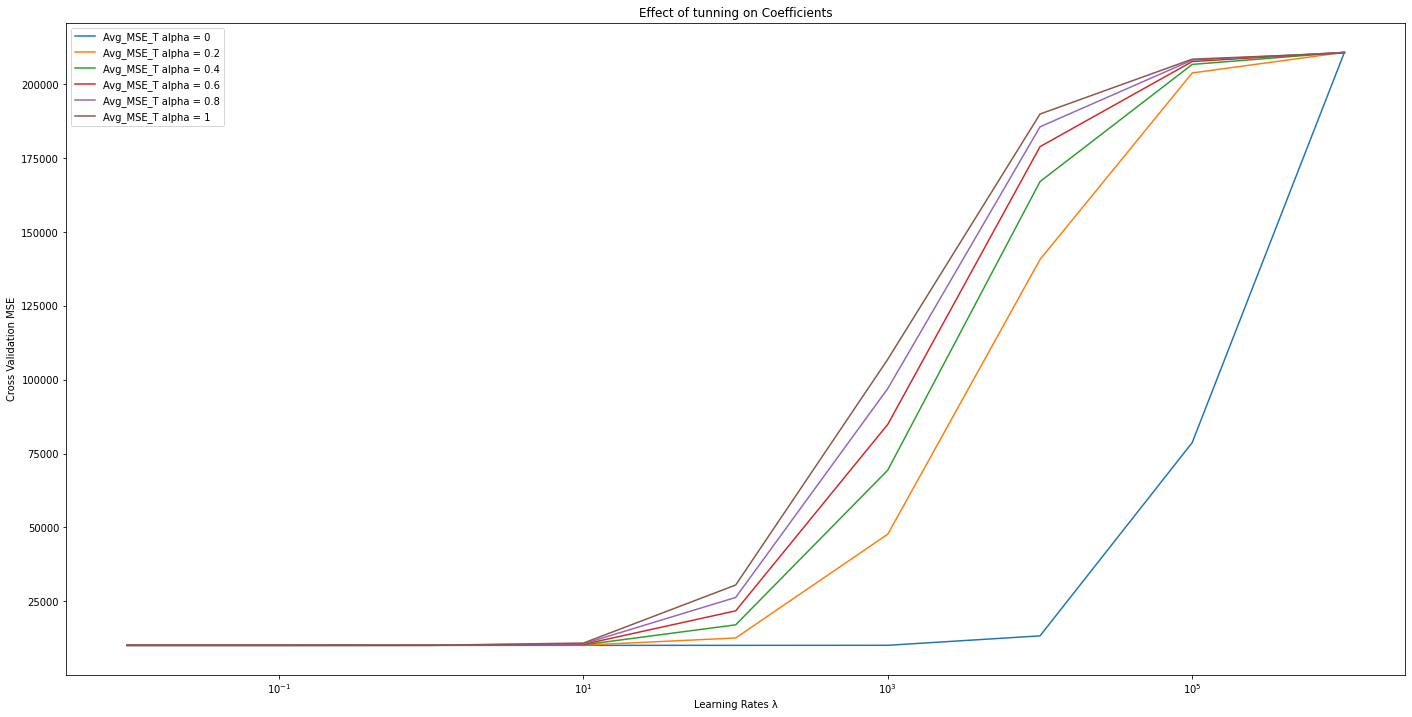

In [35]:
plt.figure(figsize=(24,12))

plt.plot( SmCVMSE[SmCVMSE.l1_ratio.eq(0)]["alpha_λ"] , np.absolute( SmCVMSE[SmCVMSE.l1_ratio.eq(0)]["Avg_MSE_Training"] ), label='Avg_MSE_T alpha = 0')
plt.plot( SmCVMSE[SmCVMSE.l1_ratio.eq(0.2)]["alpha_λ"] , np.absolute( SmCVMSE[SmCVMSE.l1_ratio.eq(0.2)]["Avg_MSE_Training"] ), label='Avg_MSE_T alpha = 0.2')
plt.plot( SmCVMSE[SmCVMSE.l1_ratio.eq(0.4)]["alpha_λ"] , np.absolute( SmCVMSE[SmCVMSE.l1_ratio.eq(0.4)]["Avg_MSE_Training"] ), label='Avg_MSE_T alpha = 0.4')
plt.plot( SmCVMSE[SmCVMSE.l1_ratio.eq(0.6)]["alpha_λ"] , np.absolute( SmCVMSE[SmCVMSE.l1_ratio.eq(0.6)]["Avg_MSE_Training"] ), label='Avg_MSE_T alpha = 0.6')
plt.plot( SmCVMSE[SmCVMSE.l1_ratio.eq(0.8)]["alpha_λ"] , np.absolute( SmCVMSE[SmCVMSE.l1_ratio.eq(0.8)]["Avg_MSE_Training"] ), label='Avg_MSE_T alpha = 0.8')
plt.plot( SmCVMSE[SmCVMSE.l1_ratio.eq(1)]["alpha_λ"] , np.absolute( SmCVMSE[SmCVMSE.l1_ratio.eq(1)]["Avg_MSE_Training"] ), label='Avg_MSE_T alpha = 1')


#plt.plot(par,Avg_MSE_Training)
plt.title('Effect of tunning on Coefficients')
plt.xlabel('Learning Rates λ')
plt.ylabel('Cross Validation MSE')

plt.xscale('log')
plt.legend(loc=0)

plt.show()

**CV Elastic Net with Library**

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

#Define the model
Library_ElasticNet = ElasticNet()

# Create the Kfold:
cv_iterator = KFold(n_splits = 5, shuffle=True, random_state=101)
cv_score = cross_val_score(Library_ElasticNet, Xst, y_Centered, cv=cv_iterator, scoring='neg_mean_squared_error', n_jobs=1)
#print (cv_score)
#print ('Cv score: mean %0.3f std %0.3f' % (np.mean(np.abs(cv_score)), np.std(cv_score))) 

# define grid
Parm_grid = dict()
Parm_grid['alpha'] = learning_rates_λ
Parm_grid['l1_ratio'] = l1_ratio

In [37]:
# Lets define search
GsearchCV = GridSearchCV(estimator = Library_ElasticNet, param_grid = Parm_grid, scoring = 'neg_mean_absolute_error', n_jobs=1, refit=True, cv=cv_iterator)
GsearchCV.fit(Xst, y_Centered)



GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=1,
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0,
                                   100000.0, 1000000.0],
                         'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [38]:
GCV_df = pd.concat([pd.DataFrame(GsearchCV.cv_results_["params"]),pd.DataFrame(GsearchCV.cv_results_["mean_test_score"], columns=["mean_test_score"])],axis=1)
#GCV_df.index=GCV_df['alpha']

GCV_df[:3]

,alpha,l1_ratio,mean_test_score
0,0.01,0.0,-82.209374
1,0.01,0.2,-81.839589
2,0.01,0.4,-81.471794


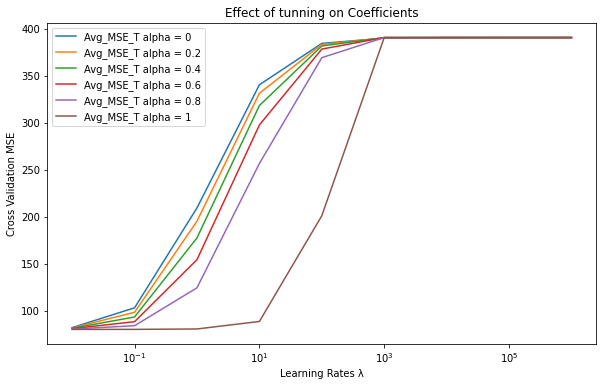

In [39]:
plt.figure(figsize=(25/2.54,15/2.54))

plt.plot( GCV_df[GCV_df.l1_ratio.eq(0)]["alpha"] , np.absolute( GCV_df[GCV_df.l1_ratio.eq(0)]["mean_test_score"] ), label='Avg_MSE_T alpha = 0')

plt.plot( GCV_df[GCV_df.l1_ratio.eq(0.2)]["alpha"] , np.absolute( GCV_df[GCV_df.l1_ratio.eq(0.2)]["mean_test_score"]), label='Avg_MSE_T alpha = 0.2')

plt.plot( GCV_df[GCV_df.l1_ratio.eq(0.4)]["alpha"] , np.absolute( GCV_df[GCV_df.l1_ratio.eq(0.4)]["mean_test_score"]), label='Avg_MSE_T alpha = 0.4')
plt.plot( GCV_df[GCV_df.l1_ratio.eq(0.6)]["alpha"] , np.absolute( GCV_df[GCV_df.l1_ratio.eq(0.6)]["mean_test_score"]), label='Avg_MSE_T alpha = 0.6')
plt.plot( GCV_df[GCV_df.l1_ratio.eq(0.8)]["alpha"] , np.absolute( GCV_df[GCV_df.l1_ratio.eq(0.8)]["mean_test_score"]), label='Avg_MSE_T alpha = 0.8')
plt.plot( GCV_df[GCV_df.l1_ratio.eq(1)]["alpha"] , np.absolute( GCV_df[GCV_df.l1_ratio.eq(1)]["mean_test_score"]), label='Avg_MSE_T alpha = 1')


plt.title('Effect of tunning on Coefficients')
plt.xlabel('Learning Rates λ')
plt.ylabel('Cross Validation MSE')

plt.xscale('log')
plt.legend(loc=0)

plt.show()

# **Deliverable 6.3**  <a class="anchor" id="Deliverable_6.3"></a>
Indicate the value of 𝜆 that generated the smallest CV(5) error

**Smallest MCV with Library**

In [46]:
print('Result fo the smallet CV MSE ', elastic_net_cv[-1])

print ('Best CV mean squared error: %0.3f' % np.abs(elastic_net_cv[-3]))

Result fo the smallet CV MSE  (0.1, 1.0)
Best CV mean squared error: 10079.514


**Smallest CV with Library**

In [47]:
print ('Best: ',GsearchCV.best_params_)
print ('Best CV mean squared error: %0.3f' % np.abs(GsearchCV.best_score_))

Best:  {'alpha': 0.01, 'l1_ratio': 1}
Best CV mean squared error: 80.293


In [48]:
GCV_df.sort_values(by=['mean_test_score'], ascending=False)[:1]


,alpha,l1_ratio,mean_test_score
5,0.01,1.0,-80.292628


In [49]:
# Alternative: sklearn.linear_model.ElasticNetCV
from sklearn.linear_model import ElasticNetCV


auto_EN = ElasticNetCV(alphas=learning_rates_λ, l1_ratio = l1_ratio, normalize=False,  n_jobs=1,  cv=cv_iterator)
auto_EN.fit(Xst, y_Centered)
print ('Best alpha: %0.5f' % auto_EN.alpha_)
print ('Best L1 ratio: %0.5f' % auto_EN.l1_ratio_)

Best alpha: 0.10000
Best L1 ratio: 1.00000


# **Deliverable 6.4**  <a class="anchor" id="Deliverable_6.4"></a>
Given the optimal 𝜆, retrain your model on the entire dataset of 𝑁=400 observations and provide the estimates of the 𝑝=9 best-fit model parameters.

**Tunned with best alpha Manually**

In [44]:

cord_best = coordinateDescent(Xst, y_Centered , elastic_net_cv[-1][0] , elastic_net_cv[-1][1]) 

print ("Betas= ", cord_best)
y_predM_best = predict(X_test,cord_best)
print("MSE = ",mean_squared_error(y_test, y_predM_best))
print('R^2 Test', r2_score(y_test, y_predM_best))


Betas=  [-274.30903456  432.1464058   182.98660772   24.00743159  -10.97386065
   -3.40862263   -5.19005735  127.82202155   -3.51242748]
MSE =  11072.765819944621
R^2 Test 0.928405681656307


**Tunned with best alpha with Library**

In [45]:
Library_ElasticNet_best=ElasticNet(alpha=GsearchCV.best_params_['alpha'] , l1_ratio= GsearchCV.best_params_['l1_ratio'], max_iter=1000, tol=0.1)
Library_ElasticNet_best.fit( Xst, y_Centered )

y_predM_best = Library_ElasticNet_best.predict(X_test)
print ("Betas= ", Library_ElasticNet_best.coef_)

print("MSE = ",mean_squared_error(y_test, y_predM_best))
print('R^2 Test', r2_score(y_test, y_predM_best))

Betas=  [-193.16266951  549.30652414    2.76276598   34.47261584  -19.09081599
   -2.9575089    -3.35695953  126.36621635   -4.07222807]
MSE =  12270.686244770783
R^2 Test 0.9206601646246965


# **Deliverable 6. Reason for difference**  <a class="anchor" id="Deliverable_6_Reason_for_difference"></a>